In [1]:
%autosave 1

Autosaving every 1 seconds


In [2]:
%config IPCompleter.greedy=True

#### ** The codes bellow is taken from [THIS](https://nbviewer.jupyter.org/github/TarrySingh/Machine-Learning-Tutorials/blob/master/kaggle/titanic.ipynb#Kaggle-Machine-Learning-Competition:-Predicting-Titanic-Survivors) tutorial.

In [3]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10 

In [4]:
df_train = pd.read_csv('./dataset/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**The elaboration of column name:**
- Survived -> If a passenger survived or not
- Pclass -> passenger class
- SibSp -> Number of (siblings + spouses)
- Parch -> Number of (parents + children)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Missing value columns -> Age, Cabin, Embarked

**Note:** In the above cell **Age, Cabin and Embarked** have missing values

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Age Counts')

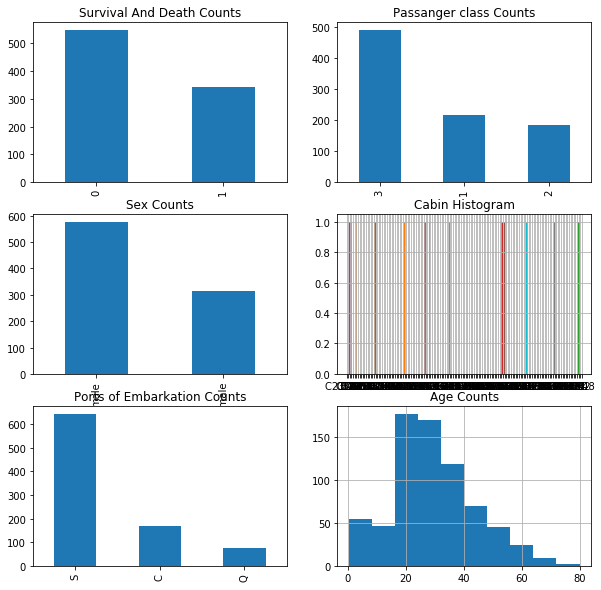

In [9]:
fig = plt.figure(figsize=fizsize_with_subplots)
# Number of (row, column) to be used to plot all figure
fig_dims = (3, 2)

# 1. Plot Survival and Death counts
plt.subplot2grid(fig_dims, (0,0))
df_train['Survived'].value_counts().plot(
    kind='bar', 
    title='Survival And Death Counts'
)

# 2. Passanger class Counts
plt.subplot2grid(fig_dims, (0,1))
df_train['Pclass'].value_counts().plot(
    kind='bar', 
    title='Passanger class Counts'
)

# 3. Plot Sex counts
plt.subplot2grid(fig_dims, (1,0))
df_train['Sex'].value_counts().plot(
    kind='bar', 
    title='Sex Counts'
)

# 4. Plot Cabin counts
plt.subplot2grid(fig_dims, (1,1))
df_train['Cabin'].hist()
plt.title('Cabin Histogram')

# 4. Ports of Embarkation Counts
plt.subplot2grid(fig_dims, (2,0))
df_train['Embarked'].value_counts().plot(
    kind='bar', 
    title='Ports of Embarkation Counts'
)

# 5. Age Counts
plt.subplot2grid(fig_dims, (2,1))
df_train['Age'].hist()
plt.title('Age Counts')

# df_train['Cabin'].value_counts()

## Feature: Passenger Classes
Now, generate across tab of Pclass and Survived: 

In [10]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

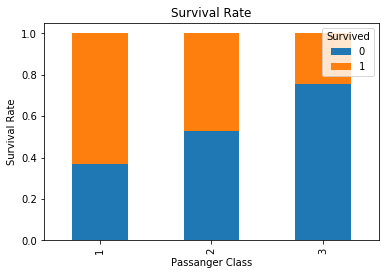

In [11]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(
    kind='bar', 
    stacked=True, 
    title='Survival Rate'
)
plt.xlabel('Passanger Class')
plt.ylabel('Survival Rate')

It is seen that **passanger class** seems to have a significant impact on whether a passanger servived. Higher class passanger have more chance to survive.

### Decision:
The **higher is the passenger class**, the more the **survival rate** is.

## Feature: Sex
Now, a mapping of sex from a `string` to a `number` will be generated

In [12]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes))))
genders_mapping

{'female': 0, 'male': 1}

Now, we'll transform Sex from a `string` to a `number` representation in a  new column *Sex_Val*

In [13]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Generate a cross tab of **Sex_Val** and **Survived**

In [14]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt

Survived,0,1
Sex_Val,,
0,81,233
1,468,109


 
Plot a normalized (i.e., in [0, 1]) cross tab of **Sex_Val** and **Survived**

Text(0, 0.5, 'Survival Rate')

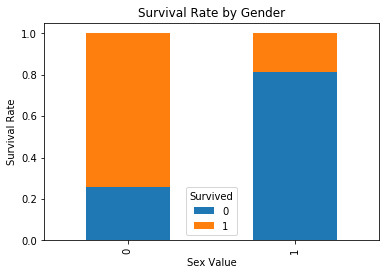

In [15]:
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(
    kind='bar', 
    stacked=True, 
    title='Survival Rate by Gender'
)
plt.xlabel('Sex Value')
plt.ylabel('Survival Rate')

From the above plot, it is seen that the majority of females survived, where the majority of males didn't

#### Now, count number of males and females in each Pclass

In [16]:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('Male  : ', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print('Female: ', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

Male  :  1 122
Female:  1 94
Male  :  2 108
Female:  2 76
Male  :  3 347
Female:  3 144


**Plot survival rate by sex and Pclass**

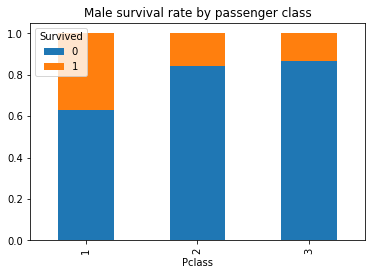

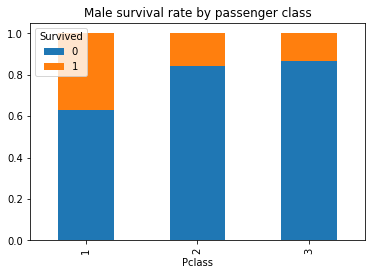

In [17]:
# Male survival rate by Pclass
male_df = df_train[df_train['Sex'] == 'male']
male_xt = pd.crosstab(male_df['Pclass'], male_df['Survived'])
male_xt_pct = male_xt.div(male_xt.sum(1).astype(float), axis=0)
male_xt_pct.plot(
    kind='bar', 
    stacked=True, 
    title='Male survival rate by passenger class'
)

# Female survival rate by Pclass
female_df = df_train[df_train['Sex'] == 'male']
female_xt = pd.crosstab(female_df['Pclass'], female_df['Survived'])
female_xt_pct = female_xt.div(female_xt.sum(1).astype(float), axis=0)
female_xt_pct.plot(
    kind='bar', 
    stacked=True, 
    title='Male survival rate by passenger class'
)



## Feature: Embarked
The Embarkment column might be an important feature, but it is missing some data points, which might be a paroblem for machine learning model

In [18]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


Map `Embarked`from string to a number representation

In [19]:
# Type casting
# df_train['Embarked'] = df_train.Embarked.astype(str)

df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As the majority of passengers embarked in 'S', we'll assign the missing values in Embarked to 'S':

In [20]:
df_train['Embarked'] = df_train['Embarked'].replace(np.nan, 'S')
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Now, transform the embarked from string to number representation

In [21]:
embarked_locs = sorted(df_train['Embarked'].unique())
embarked_locs_mapping = dict(zip(
    embarked_locs, 
    range(1, len(embarked_locs) + 1)
))
embarked_locs_mapping

{'C': 1, 'Q': 2, 'S': 3}

In [22]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                            .map(embarked_locs_mapping) \
                            .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3


Plot histogram for "Embarked_Val"

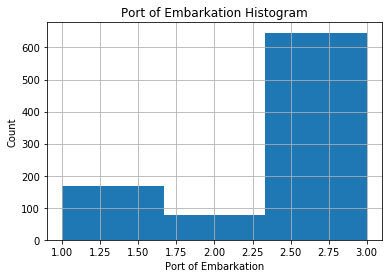

In [23]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(1, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Now check that we do not have any more NaNs for Embarked_Val:

In [24]:
embarked_locs_unique = sorted(df_train['Embarked_Val'].unique())
embarked_locs_unique

[1, 2, 3]

Plot a cross tab for **Embarked_Val** and **Survived**

Text(0, 0.5, 'Survival Rate')

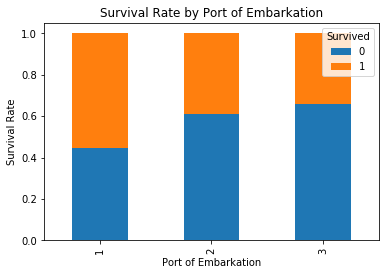

In [25]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = embarked_val_xt.div(
    embarked_val_xt.sum(1).astype(float), 
    axis=0
)
embarked_val_xt_pct.plot(
    kind='bar', 
    stacked=True
)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

It is seen those that embarked in 'C': 1 has highest survival rate

Now, we plot to determine **gender** and **passenger** class makeup for each port

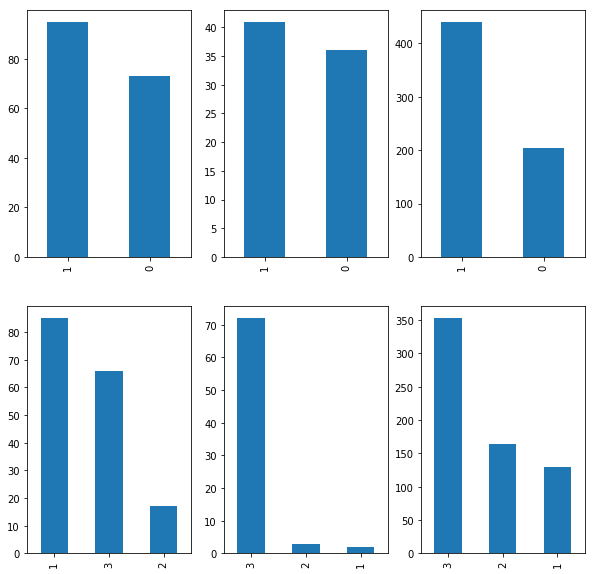

In [26]:
fig = plt.figure(figsize=fizsize_with_subplots)
# fizsize_with_subplots
rows, cols = 2, 3
col_names = ('Sex_Val', 'Pclass')

for port_idx in embarked_locs_mapping.values():
    for col_idx in range(0, len(col_names)):
        plt.subplot2grid((rows, cols), (col_idx, port_idx-1))
        df_train[df_train['Embarked_Val'] == port_idx][col_names[col_idx]] \
            .value_counts().plot(kind='bar')

### Feature: Age

In [27]:
# df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].count()
df_train[df_train['Age'].isnull()]['Sex'].count()

177

Determine the age for each passenger by `Sex_Val` using median instead of mean.

In [28]:
df_train['AgeFill'] = df_train['Age']

df_train['AgeFill'] = df_train['AgeFill'] \
    .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
    .apply(lambda x: x.fillna(x.median()))
len(df_train[df_train['AgeFill'].isnull()])

0

/home/rayhan/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rayhan/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Age')

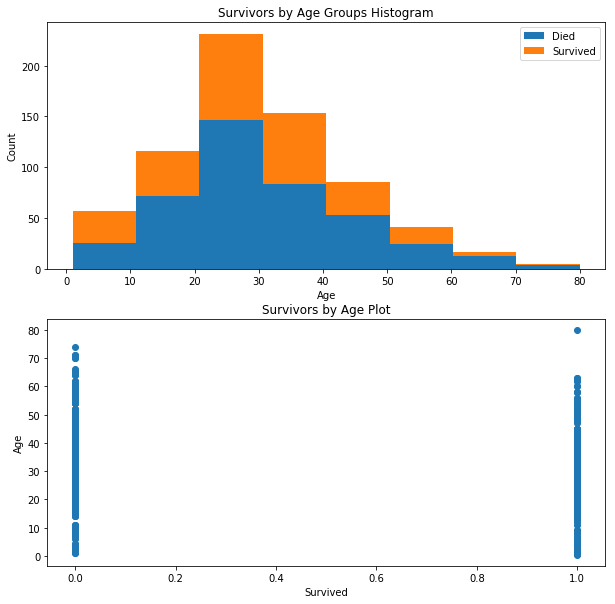

In [29]:
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by `Survived`
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
axes[0].hist(
    [df1, df2], 
    bins=int(max_age/bin_size), 
    range=(1, max_age), 
    stacked=True
)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFIll
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

This graph doesn't show anything clear

**Now, plot AgeFill density by Pclass** 

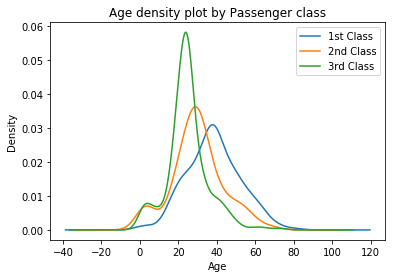

In [30]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
#     df_train[df_train['Pclass'] == pclass]['AgeFill'].plot(kind='kde')
plt.title('Age density plot by Passenger class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')


Higher class passengers are older than that of the lower class.

---

Now, draw `AgeFill` histogram for the survivors

Text(0, 0.5, 'NUmber of Survivors')

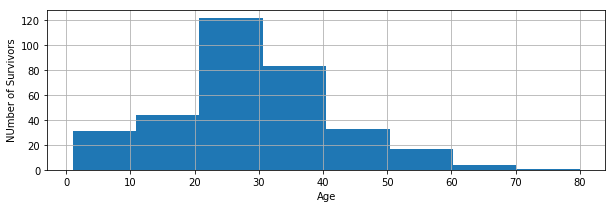

In [31]:
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (3, 1)

# plot the AgeFill histgram for survivors
plt.subplot2grid(fig_dims, (0, 0))
survivor_df = df_train[df_train['Survived'] == 1]
survivor_df['AgeFill'].hist(bins=int(max_age/bin_size), range=(1, max_age))
plt.xlabel('Age')
plt.ylabel('NUmber of Survivors')

It is seen that, most survivors are from the age of 20's to 30's

---

Now, draw `AgeFill` histogram for the `female survivors`

Text(0, 0.5, '#male survivors')

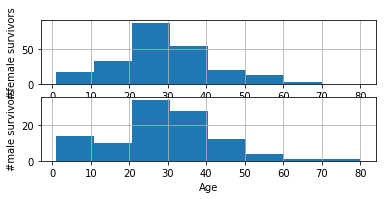

In [32]:
# plot the AgeFill histgram for female survivors
plt.subplot2grid(fig_dims, (1, 0))
survivor_df = df_train[(df_train['Survived'] == 1) & (df_train['Sex_Val'] == 0)]
survivor_df['AgeFill'].hist(bins=int(max_age/bin_size), range=(1, max_age))
plt.xlabel('Age')
plt.ylabel('#female survivors')

# plot the AgeFill histgram for male survivors
plt.subplot2grid(fig_dims, (2, 0))
survivor_df = df_train[(df_train['Survived'] == 1) & (df_train['Sex_Val'] == 1)]
survivor_df['AgeFill'].hist(bins=int(max_age/bin_size), range=(1, max_age))
plt.xlabel('Age')
plt.ylabel('#male survivors')

For female and male servivors, it is seen that, most survivors were from the age of 20's and 30's.

## Feature: Family Size

Faamily size = No. of siblings & spouses + No. of parents & children

In [33]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
# df_train.head()
df_train['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

It is seen that most of the passenger travelled alone without any family member.

---

Plot a histogram of `FamilySize`.

Text(0.5, 1.0, 'Family Size Histogram')

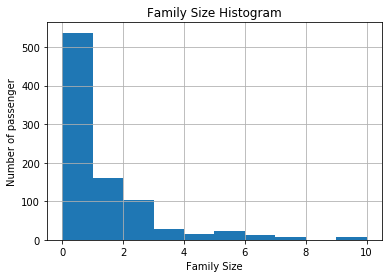

In [34]:
df_train['FamilySize'].hist()
plt.xlabel('Family Size')
plt.ylabel('Number of passenger')
plt.title('Family Size Histogram')

Now, plot a histogram of `FamilySize` segmented by `Survived`

Text(0.5, 1.0, 'Survivors by Family Size')

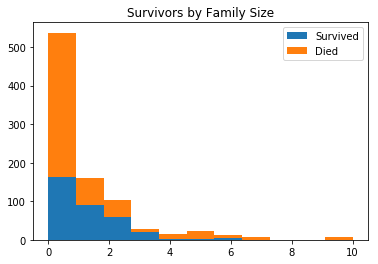

In [35]:
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 1]['FamilySize']
df2 = df_train[df_train['Survived'] == 0]['FamilySize']
plt.hist(
    [df1, df2], 
    bins=family_size_max+1, 
    range=(0, family_size_max), 
    stacked=True
)
plt.legend(('Survived', 'Died'), loc='best')
plt.title('Survivors by Family Size')


## Final Data Preparation for Machine Learning

Many machine learning algorithm don't work on `string` and they usuallr require data as `array or list`, not a DataFrame.

Show object(string) type columns:

In [36]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Drop these object type columns:

In [37]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Sex_Val           int64
Embarked_Val      int64
AgeFill         float64
FamilySize        int64
dtype: object

In [38]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId'], axis=1)
df_train.dtypes

Survived          int64
Pclass            int64
Fare            float64
Sex_Val           int64
Embarked_Val      int64
AgeFill         float64
FamilySize        int64
dtype: object

In [39]:
df_train

,Survived,Pclass,Fare,Sex_Val,Embarked_Val,AgeFill,FamilySize
0,0,3,7.2500,1,3,22.0,1
1,1,1,71.2833,0,1,38.0,1
2,1,3,7.9250,0,3,26.0,0
3,1,1,53.1000,0,3,35.0,1
4,0,3,8.0500,1,3,35.0,0
5,0,3,8.4583,1,2,25.0,0
6,0,1,51.8625,1,3,54.0,0
7,0,3,21.0750,1,3,2.0,4
8,1,3,11.1333,0,3,27.0,2
9,1,2,30.0708,0,1,14.0,1


Reason for removing above column
- Age: We've ussed `AgeFill` due to some missing value of Age
- SibSp, Parch: we calculated `FamilySize` using the two
- PassengerId: Doesn't bear any meaning, just like `Name`

---

Convert this dataframe to `numpy` array

In [40]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  3.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  1.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  3.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  3.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  1.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  2.    , 32.    ,  0.    ]])

## Data Cleaning Summary

We will aggreegate the steps of cleaning the data into one place and will put those inside a function so that we can clean the **testing data** the same way as **training data**. 

In [41]:
def clean_data(df, drop_passenger_id):
    # Find the unique Sex values
    sexes = sorted(df['Sex'].unique())
    
    # Gender mapping from a string to a number representation
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
    
    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Replace np.nan with S, as the number of S is much more than others
    if len(df[df['Embarked'].isnull()]) > 0:
        df['Embarked'] = df['Embarked'].replace(np.nan, 'S')
    
    # Find the unique Embarked values
    embarked_locs = sorted(df['Embarked'].unique())
    
    # Generate a mapping of Embarked from a string to a number representation  
    embarked_locs_mapping = dict(zip(embarked_locs, range(1, len(embarked_locs) + 1)))
    
    df['Embarked_Val'] = df['Embarked'].map(
        embarked_locs_mapping).astype(int)
    
#     # Transform Embarked from a string to dummy variables
#     df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
#     # Fill in missing values of Embarked
#     # Since the vast majority of passengers embarked in 'S': 3, 
#     # we assign the missing values in Embarked to 'S':
#     if len(df[df['Embarked'].isnull()] > 0):
#         df.replace({'Embarked_Val': { 
#                     embarked_locs_mapping[nan] : embarked_locs_mapping['S'] 
#         }},inplace=True)
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()]) > 0:
        avg_fare = df['Fare'].mean()
        df['Fare'] = df['Fare'].replace(np.nan, avg_fare)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']
    
    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'].groupby(
        [df['Sex_Val'], df['Pclass']]
    ).apply(lambda x: x.fillna(x.median()))
    
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    # Drop the PassengerId column since it won't be used as a feature.
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df


In [88]:
def prepare_data(df, drop_passenger_id=True):
    
    # Replace np.nan with S, as the number of S is much more than others
    if len(df[df['Embarked'].isnull()]) > 0:
        df['Embarked'] = df['Embarked'].replace(np.nan, 'S')
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()]) > 0:
        avg_fare = df['Fare'].mean()
        df['Fare'] = df['Fare'].replace(np.nan, avg_fare)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']
    
    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'].groupby(
        [df['Sex'], df['Pclass']]
    ).apply(lambda x: x.fillna(x.median()))
    
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    
    df = pd.concat([
        df, 
        pd.get_dummies(df['Embarked'], prefix='Embarked'), 
        pd.get_dummies(df['Sex'], prefix='Sex'), 
        pd.get_dummies(df['Pclass'], prefix='Pclass')
    ], axis=1)
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    # Drop the PassengerId column since it won't be used as a feature.
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

## Random Forest: Training

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [97]:
# First column is "Survived", which is for target 
# and rest of the columns are for features
df_train = pd.read_csv('./dataset/train.csv')
df_train = prepare_data(df_train)
print(df_train['AgeFill'].unique())

train_data = df_train.values

train_features = train_data[:, 1:]
train_target = train_data[:, 0]

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
# score() returns the mean accuracy on the given test data and labels
score = clf.score(train_features, train_target)
'Mean accuracy of the Random Forest Classifier: {}'.format(score)

[22.   38.   26.   35.   25.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   30.   31.   21.5  34.   15.   28.    8.   19.   40.   66.
 42.   21.   18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.
 17.   32.   16.    0.83 33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


'Mean accuracy of the Random Forest Classifier: 0.9809203142536476'

# Random Forest: Predicting
#### Read test data:

In [91]:
df_test = pd.read_csv('./dataset/test.csv')
# df_test['Embarked'].unique()

In [92]:
df_test = prepare_data(df_test, drop_passenger_id=False)
# print('Train Data')
# print('-'*75)
# print(df_train.head())
# print('='*75)
# print('Test Data')
# print('-'*75)
print(df_test.head())

   PassengerId     Fare  AgeFill  FamilySize  Embarked_C  Embarked_Q  \
0          892   7.8292     34.5           0           0           1   
1          893   7.0000     47.0           1           0           0   
2          894   9.6875     62.0           0           0           1   
3          895   8.6625     27.0           0           0           0   
4          896  12.2875     22.0           2           0           0   

   Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  
0           0           0         1         0         0         1  
1           1           1         0         0         0         1  
2           0           0         1         0         1         0  
3           1           0         1         0         0         1  
4           1           1         0         0         0         1  


In [93]:
test_data = df_test.values
test_data

array([[8.92000e+02, 7.82920e+00, 3.45000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [8.93000e+02, 7.00000e+00, 4.70000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [8.94000e+02, 9.68750e+00, 6.20000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [1.30700e+03, 7.25000e+00, 3.85000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.30800e+03, 8.05000e+00, 2.40000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.30900e+03, 2.23583e+01, 2.40000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [94]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test_data[:, 1:]

# Predict the Survival values for the test data
test_y = clf.predict(test_x)

In [95]:
df_test['Survived'] = test_y.astype(int)
df_test.head()

,PassengerId,Fare,AgeFill,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Survived
0,892,7.8292,34.5,0,0,1,0,0,1,0,0,1,0
1,893,7.0000,47.0,1,0,0,1,1,0,0,0,1,0
2,894,9.6875,62.0,0,0,1,0,0,1,0,1,0,0
3,895,8.6625,27.0,0,0,0,1,0,1,0,0,1,1
4,896,12.2875,22.0,2,0,0,1,1,0,0,0,1,1


## Random Forest: Prepare for Kaggle Submission
Create a **DataFrame** by combining the index from test data with the output of prediction and then write the result to output **CSV** file

In [96]:
df_test[['PassengerId', 'Survived']].to_csv('./output.csv', index=False)

================== **End of Getting the Output** =======================

## Evaluating Model Accuracy

In [50]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split 80-20 train vs test data
train_data_x, test_data_x, train_data_y, test_data_y = train_test_split(
    train_features, 
    train_target, 
    test_size=0.20, 
    random_state=0
)

print(train_features.shape, train_target.shape)
print(train_data_x.shape, train_data_y.shape)
print(test_data_x.shape, test_data_y.shape)

(891, 6) (891,)
(712, 6) (712,)
(179, 6) (179,)


In [51]:
from sklearn.metrics import accuracy_score

random_forest_clf = clf.fit(train_data_x, train_data_y)
predict_y = random_forest_clf.predict(test_data_x)

accuracy = accuracy_score(test_data_y, predict_y)
print('Accuracy = ', accuracy)

Accuracy =  0.8379888268156425


## Get Classification Report

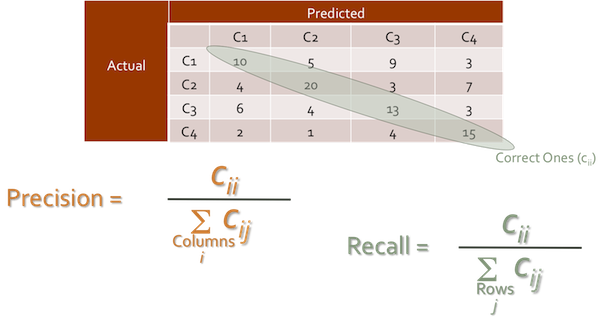

In [52]:
from IPython.core.display import Image 
Image(filename='./img/confusion_matrix.png')